<div style="text-align: center;">
  <img width="240" height="240" src="https://www.naterscreations.com/imputegap/logo_imputegab.png" />
</div>
<h1>ImputeGAP: Tutorial Notebook</h1>




Notebook 2: Imputer

# 1.&nbsp;Installation


ImputeGAP is a comprehensive end-to-end imputation library that covers the whole imputation workflow, from data collection to explaining the results and their implications. It consists of two interconnected components: the imputation module and the advanced analysis module. These components can be used together through a standardized and configuration-based pipeline, or separately via independent instantiation. The documentation is available on: https://imputegap.readthedocs.io/

This notebook showcases key steps of the imputation: imputation pipeline synthesis and advanced analysis. Before getting started, please make sure to install the library along with the required Jupyter dependencies:

In [ ]:
%pip install imputegap==1.1.2

In [ ]:
%pip install -U ipywidgets

In [3]:
import pandas as pd
def imputegap_jupyter(matrix):
    df = pd.DataFrame(matrix).head(10).reset_index(drop=True)
    df.index += 1  # Start index at 1 instead of 0
    return df.style.format(precision=2)

# 4.&nbsp;Imputation

In this section, we will illustrate how to impute the contaminated time series. Our library implements five families of imputation algorithms: Statistical, Machine Learning, Matrix Completion, Deep Learning, and Pattern Search.

All algorithms developed in ImputeGAP are available in the ``ts.algorithms`` module, which can be listed as follows:


In [56]:
ts.algorithms_with_families

['DeepLearning.BRITS',
 'DeepLearning.BayOTIDE',
 'DeepLearning.BitGraph',
 'DeepLearning.CSDI',
 'DeepLearning.DeepMVI',
 'DeepLearning.GAIN',
 'DeepLearning.GRIN',
 'DeepLearning.HKMFT',
 'DeepLearning.MPIN',
 'DeepLearning.MRNN',
 'DeepLearning.MissNet',
 'DeepLearning.PRISTI',
 'DeepLearning.SAITS',
 'DeepLearning.TimesNet',
 'LLMs.GPT4TS',
 'LLMs.NuwaTS',
 'MachineLearning.IIM',
 'MachineLearning.MICE',
 'MachineLearning.MissForest',
 'MachineLearning.XGBOOST',
 'MatrixCompletion.CDRec',
 'MatrixCompletion.GROUSE',
 'MatrixCompletion.IterativeSVD',
 'MatrixCompletion.ROSL',
 'MatrixCompletion.SPIRIT',
 'MatrixCompletion.SVT',
 'MatrixCompletion.SoftImpute',
 'MatrixCompletion.TRMF',
 'PatternSearch.DynaMMo',
 'PatternSearch.STMVL',
 'PatternSearch.TKCM',
 'Statistics.Interpolation',
 'Statistics.KNNImpute',
 'Statistics.MeanImpute',
 'Statistics.MeanImputeBySeries',
 'Statistics.MinImpute',
 'Statistics.ZeroImpute']

We will illusrate the imputation performed by the CDRec technique from Matrix Completion of the BAFU datat with MCAR missing blocks.


ImputeGAP Library has been invoked (https://github.com/eXascaleInfolab/ImputeGAP)


Imputation algorithms : ['BRITS', 'BayOTIDE', 'BitGraph', 'CDRec', 'CSDI', 'DeepMVI', 'DynaMMo', 'GAIN', 'GPT4TS', 'GRIN', 'GROUSE', 'HKMFT', 'IIM', 'Interpolation', 'IterativeSVD', 'KNNImpute', 'MICE', 'MPIN', 'MRNN', 'MeanImpute', 'MeanImputeBySeries', 'MinImpute', 'MissForest', 'MissNet', 'NuwaTS', 'PRISTI', 'ROSL', 'SAITS', 'SPIRIT', 'STMVL', 'SVT', 'SoftImpute', 'TKCM', 'TRMF', 'TimesNet', 'XGBOOST', 'ZeroImpute']

(SYS) The dataset is loaded from /mnt/c/Users/nquen/switchdrive/MST_MasterThesis/imputegap/imputegap/datasets/chlorine.txt

> logs: normalization (z_score) of the data - runtime: 0.0009 seconds

(CONT) missigness pattern: MCAR
	selected series: 14, 18, 20, 26, 27, 31, 33, 40, 46, 49
	percentage of contaminated series: 20.0%
	rate of missing data per series: 20.0%
	block size: 10
	security offset: [0-100]
	seed value: 42


(IMPUTATION) CDRec
	Matrix: 1000, 50
	truncation rank: 3
	epsilon

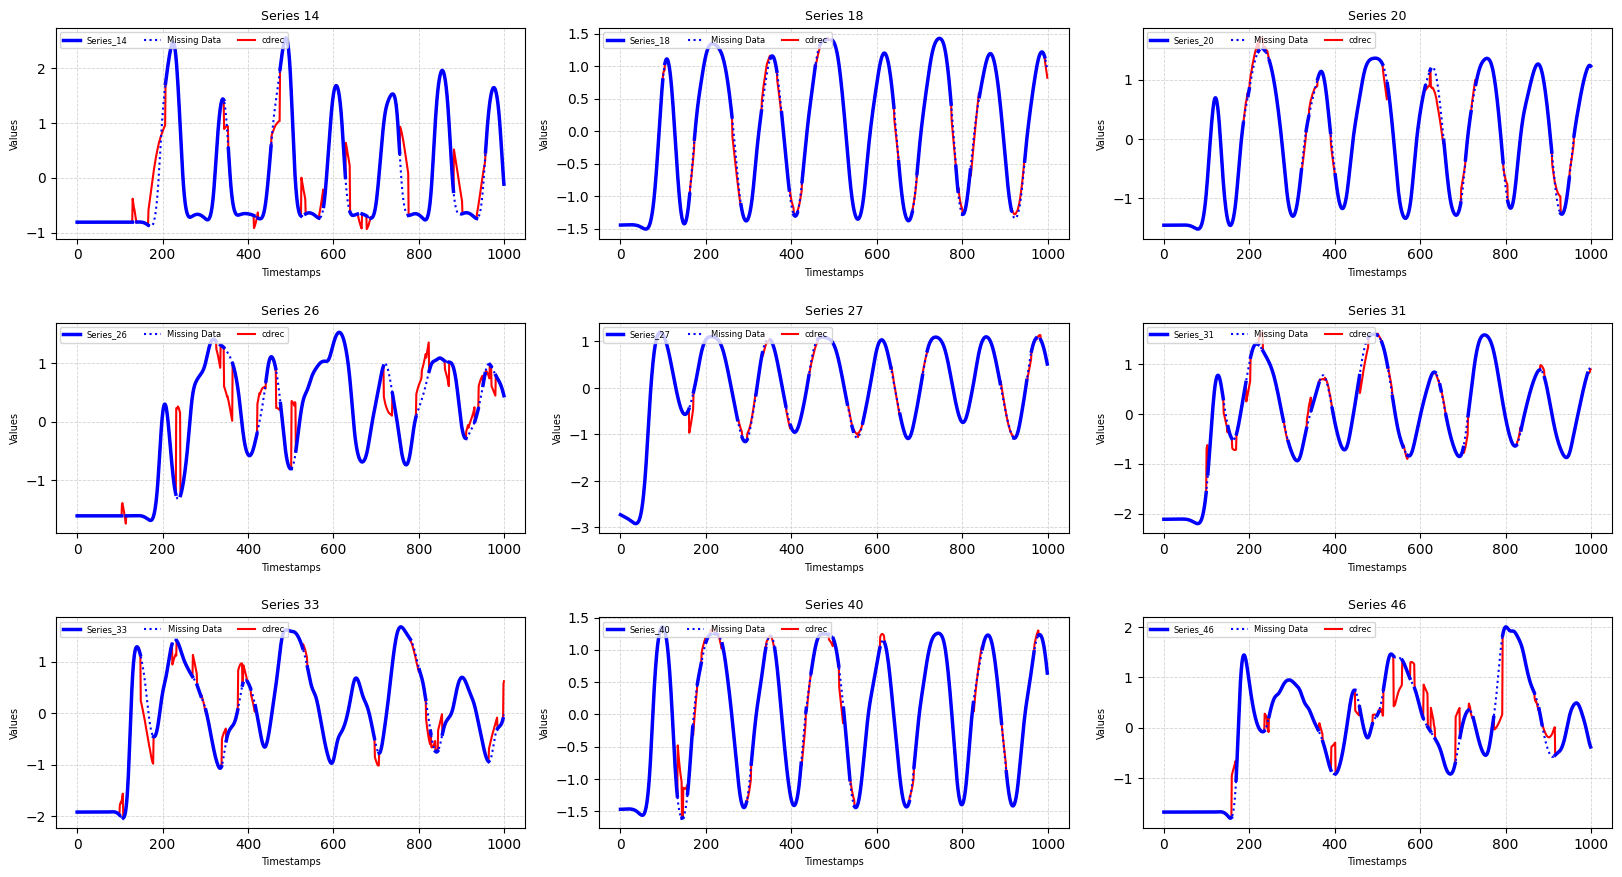

In [57]:
from imputegap.recovery.imputation import Imputation
from imputegap.recovery.contamination import GenGap
from imputegap.recovery.manager import TimeSeries
from imputegap.tools import utils

# initialize the time series object
ts = TimeSeries()
print(f"\nImputation algorithms : {ts.algorithms}")

# load and normalize the dataset
ts.load_series(utils.search_path("chlorine"), normalizer="z_score")

# contaminate the time series
ts_m = GenGap.mcar(ts.data)

# impute the contaminated series
imputer = Imputation.MatrixCompletion.CDRec(ts_m)
imputer.impute()

# compute and print the imputation metrics
imputer.score(ts.data, imputer.recov_data)
ts.print_results(imputer.metrics)


# plot the recovered time series
ts.plot(input_data=ts.data, incomp_data=ts_m, recov_data=imputer.recov_data, nbr_series=9, subplot=True, algorithm=imputer.algorithm, save_path="./imputegap_assets/imputation")
%matplotlib inline
ts.plots.show()

<br>


Now, let's see the result for a new pattern of contamination.


ImputeGAP Library has been invoked (https://github.com/eXascaleInfolab/ImputeGAP)


(SYS) The dataset is loaded from /mnt/c/Users/nquen/switchdrive/MST_MasterThesis/imputegap/imputegap/datasets/chlorine.txt

> logs: normalization (z_score) of the data - runtime: 0.0006 seconds

(CONT) missigness pattern: ALIGNED
	percentage of contaminated series: 20.0%
	rate of missing data per series: 20.0%
	security offset: [0-100]
	timestamps impacted : 100 -> 299
	series impacted : 0 -> 9


(IMPUTATION) CDRec
	Matrix: 1000, 50
	truncation rank: 3
	epsilon: 1e-06
	iterations: 100

call: cdrec.impute(params={'rank': 3, 'epsilon': 1e-06, 'iterations': 100})

> logs: imputation cdrec - Execution Time: 1.0993 seconds.

Results :
RMSE                 = 0.6189010710904136
MAE                  = 0.48443481948476097
MI                   = 0.7492599541483888
CORRELATION          = 0.7649695533613601

plots saved in: ./imputegap_assets/imputation/26_01_22_16_01_00_cdrec_plot.jpg


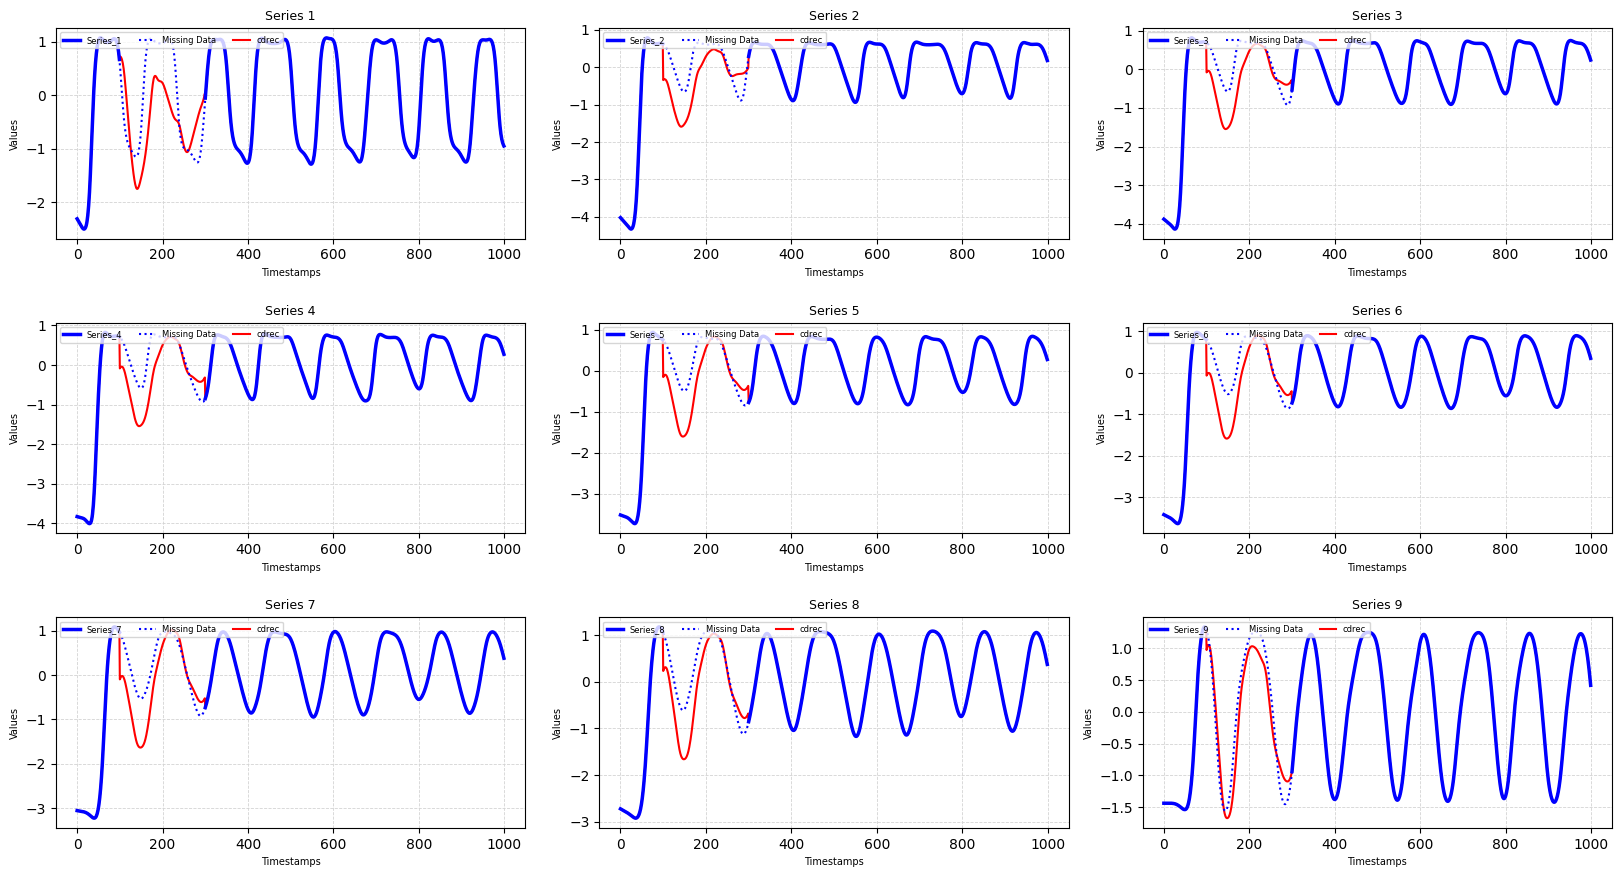

In [58]:
from imputegap.recovery.imputation import Imputation
from imputegap.recovery.contamination import GenGap
from imputegap.recovery.manager import TimeSeries
from imputegap.tools import utils

# initialize the time series object
ts = TimeSeries()

# load and normalize the dataset
ts.load_series(utils.search_path("chlorine"), normalizer="z_score")

# contaminate the time series
ts_m = GenGap.aligned(ts.data)

# impute the contaminated series
imputer = Imputation.MatrixCompletion.CDRec(ts_m)
imputer.impute()

# compute and print the imputation metrics
imputer.score(ts.data, imputer.recov_data)
ts.print_results(imputer.metrics)

# plot the recovered time series
ts.plot(input_data=ts.data, incomp_data=ts_m, recov_data=imputer.recov_data, nbr_series=9, subplot=True, algorithm=imputer.algorithm, save_path="./imputegap_assets/imputation")
%matplotlib inline
ts.plots.show()

<br>


In [59]:
imputegap_jupyter(imputer.recov_data)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
1,-2.31,-4.02,-3.88,-3.83,-3.51,-3.42,-3.06,-2.72,-1.44,-1.37,-1.20,-1.01,-0.84,-0.81,-1.47,-1.47,-1.48,-1.44,-1.48,-1.46,-1.50,-1.55,-1.56,-1.48,-1.74,-1.60,-2.73,-2.70,-2.68,-2.24,-2.12,-1.99,-1.92,-1.85,-1.85,-1.72,-1.56,-1.49,-1.41,-1.47,-1.40,-1.42,-1.49,-2.00,-1.82,-1.67,-1.60,-1.60,-1.55,-1.65
2,-2.33,-4.03,-3.89,-3.84,-3.52,-3.43,-3.06,-2.73,-1.44,-1.37,-1.20,-1.01,-0.84,-0.81,-1.47,-1.47,-1.48,-1.44,-1.48,-1.46,-1.50,-1.55,-1.56,-1.48,-1.74,-1.60,-2.73,-2.70,-2.68,-2.24,-2.12,-1.99,-1.92,-1.85,-1.85,-1.72,-1.56,-1.49,-1.41,-1.47,-1.40,-1.42,-1.49,-2.00,-1.82,-1.67,-1.60,-1.60,-1.55,-1.65
3,-2.34,-4.05,-3.90,-3.84,-3.52,-3.43,-3.06,-2.73,-1.44,-1.37,-1.20,-1.01,-0.84,-0.81,-1.47,-1.47,-1.48,-1.44,-1.48,-1.46,-1.50,-1.55,-1.56,-1.48,-1.74,-1.60,-2.73,-2.70,-2.68,-2.24,-2.12,-1.99,-1.92,-1.85,-1.85,-1.72,-1.56,-1.49,-1.41,-1.47,-1.40,-1.42,-1.49,-2.00,-1.82,-1.67,-1.60,-1.60,-1.55,-1.65
4,-2.35,-4.06,-3.91,-3.84,-3.53,-3.44,-3.06,-2.74,-1.44,-1.37,-1.20,-1.01,-0.84,-0.81,-1.47,-1.47,-1.48,-1.44,-1.48,-1.46,-1.50,-1.55,-1.56,-1.48,-1.74,-1.60,-2.74,-2.70,-2.68,-2.24,-2.12,-1.99,-1.92,-1.85,-1.85,-1.72,-1.56,-1.49,-1.41,-1.47,-1.40,-1.42,-1.49,-2.00,-1.82,-1.67,-1.60,-1.60,-1.55,-1.65
5,-2.37,-4.07,-3.92,-3.84,-3.53,-3.44,-3.07,-2.74,-1.44,-1.37,-1.20,-1.01,-0.84,-0.81,-1.47,-1.47,-1.48,-1.44,-1.48,-1.46,-1.50,-1.55,-1.56,-1.48,-1.74,-1.60,-2.74,-2.70,-2.68,-2.24,-2.11,-1.99,-1.92,-1.85,-1.85,-1.72,-1.56,-1.49,-1.41,-1.47,-1.40,-1.42,-1.49,-2.00,-1.82,-1.67,-1.60,-1.60,-1.55,-1.65
6,-2.38,-4.08,-3.93,-3.85,-3.53,-3.45,-3.07,-2.75,-1.44,-1.37,-1.20,-1.01,-0.84,-0.81,-1.47,-1.47,-1.48,-1.44,-1.48,-1.46,-1.50,-1.55,-1.56,-1.48,-1.74,-1.60,-2.75,-2.70,-2.69,-2.24,-2.11,-1.99,-1.92,-1.85,-1.85,-1.72,-1.56,-1.49,-1.41,-1.47,-1.40,-1.42,-1.49,-2.00,-1.82,-1.67,-1.60,-1.60,-1.55,-1.65
7,-2.40,-4.10,-3.93,-3.85,-3.54,-3.45,-3.07,-2.75,-1.44,-1.37,-1.20,-1.01,-0.84,-0.81,-1.47,-1.47,-1.48,-1.44,-1.48,-1.46,-1.50,-1.55,-1.56,-1.48,-1.74,-1.60,-2.75,-2.70,-2.69,-2.24,-2.11,-1.99,-1.92,-1.85,-1.85,-1.72,-1.56,-1.49,-1.41,-1.47,-1.40,-1.42,-1.49,-2.00,-1.82,-1.67,-1.60,-1.60,-1.55,-1.65
8,-2.41,-4.11,-3.94,-3.85,-3.54,-3.46,-3.07,-2.76,-1.44,-1.37,-1.19,-1.01,-0.84,-0.81,-1.47,-1.47,-1.48,-1.44,-1.48,-1.46,-1.50,-1.55,-1.56,-1.48,-1.74,-1.60,-2.76,-2.70,-2.69,-2.24,-2.11,-1.99,-1.92,-1.85,-1.85,-1.72,-1.56,-1.49,-1.41,-1.46,-1.40,-1.42,-1.49,-2.00,-1.82,-1.67,-1.60,-1.60,-1.55,-1.65
9,-2.42,-4.12,-3.95,-3.86,-3.54,-3.46,-3.07,-2.76,-1.44,-1.37,-1.19,-1.01,-0.84,-0.81,-1.47,-1.47,-1.48,-1.44,-1.48,-1.46,-1.50,-1.55,-1.56,-1.48,-1.74,-1.60,-2.76,-2.70,-2.69,-2.24,-2.11,-1.99,-1.92,-1.85,-1.85,-1.72,-1.56,-1.49,-1.41,-1.46,-1.40,-1.42,-1.49,-2.00,-1.82,-1.67,-1.60,-1.60,-1.55,-1.65
10,-2.44,-4.13,-3.96,-3.86,-3.55,-3.47,-3.07,-2.77,-1.44,-1.37,-1.19,-1.01,-0.84,-0.81,-1.47,-1.47,-1.48,-1.44,-1.48,-1.46,-1.50,-1.55,-1.56,-1.48,-1.74,-1.60,-2.77,-2.70,-2.69,-2.24,-2.11,-1.99,-1.92,-1.85,-1.85,-1.72,-1.56,-1.49,-1.41,-1.46,-1.40,-1.42,-1.49,-2.00,-1.82,-1.67,-1.60,-1.60,-1.55,-1.65


<br>


# 5.&nbsp;AutoML Parameter Tuning

mputeGAP includes a component for managing algorithm configuration and hyperparameter tuning. This component leverages various AutoML optimizers (search algorithms) to perform parameter optimization.


All the optimizers provided by the library are accessible through the `ts.optimizers` module and include the following:

In [60]:
ts.optimizers

['bayesian', 'greedy', 'particle_swarm', 'ray_tune', 'successive_halving']

Parameters are specified by supplying a dictionary that includes the ground truth, the selected optimizer, and the corresponding optimizer options.

## 5.1&nbsp;Bayesian Optimization

We illustre the parameter tuning using the Bayesian Optimization (BO) technique.

In [61]:
from imputegap.recovery.imputation import Imputation
from imputegap.recovery.contamination import GenGap
from imputegap.recovery.manager import TimeSeries
from imputegap.tools import utils

# initialize the time series object
ts = TimeSeries()

# load and normalize the dataset
ts.load_series(utils.search_path("chlorine"), normalizer="z_score")

# contaminate and impute the time series
ts_m = GenGap.mcar(ts.data)
imputer = Imputation.MatrixCompletion.CDRec(ts_m)

# use Ray Tune to fine tune the imputation algorithm
imputer.impute(user_def=False, params={"input_data": ts.data, "optimizer": "bayesian"})


ImputeGAP Library has been invoked (https://github.com/eXascaleInfolab/ImputeGAP)


(SYS) The dataset is loaded from /mnt/c/Users/nquen/switchdrive/MST_MasterThesis/imputegap/imputegap/datasets/chlorine.txt

> logs: normalization (z_score) of the data - runtime: 0.0010 seconds

(CONT) missigness pattern: MCAR
	selected series: 14, 18, 20, 26, 27, 31, 33, 40, 46, 49
	percentage of contaminated series: 20.0%
	rate of missing data per series: 20.0%
	block size: 10
	security offset: [0-100]
	seed value: 42


(OPTI) optimizer bayesian has been called with cdrec ...


(IMPUTATION) CDRec
	Matrix: 1000, 50
	truncation rank: 8
	epsilon: 0.00015566861063982882
	iterations: 857

call: cdrec.impute(params={'rank': 8, 'epsilon': 0.00015566861063982882, 'iterations': 857})


(IMPUTATION) CDRec
	Matrix: 1000, 50
	truncation rank: 5
	epsilon: 0.2569137669362513
	iterations: 934

call: cdrec.impute(params={'rank': 5, 'epsilon': 0.2569137669362513, 'iterations': 934})


> logs: optimization bayesian - 

In [62]:
imputer.parameters

(np.int64(8), 0.00015566861063982882, np.int64(857))

In [64]:
# compute the imputation metrics with optimized parameter values
imputer.score(ts.data, imputer.recov_data)

# compute the imputation metrics with default parameter values
imputer_def = Imputation.MatrixCompletion.CDRec(ts_m).impute()
imputer_def.score(ts.data, imputer_def.recov_data)

# print the imputation metrics with default and optimized parameter values
ts.print_results(imputer_def.metrics, text="Default values")
ts.print_results(imputer.metrics, text="Optimized values")

# save hyperparameters
utils.save_optimization(optimal_params=imputer.parameters, algorithm=imputer.algorithm, dataset="eeg-alcohol", optimizer="ray_tune")


(IMPUTATION) CDRec
	Matrix: 1000, 50
	truncation rank: 3
	epsilon: 1e-06
	iterations: 100

call: cdrec.impute(params={'rank': 3, 'epsilon': 1e-06, 'iterations': 100})

> logs: imputation cdrec - Execution Time: 0.6227 seconds.

Default values :
RMSE                 = 0.3898293614344092
MAE                  = 0.27122470306259755
MI                   = 0.7911691149428601
CORRELATION          = 0.8867715479958121

Optimized values :
RMSE                 = 0.23198226540006392
MAE                  = 0.15493536958322762
MI                   = 1.1169928976747936
CORRELATION          = 0.9614361726672848

(SYS) An error occurred while saving the file: [Errno 2] No such file or directory: '/mnt/c/Users/nquen/switchdrive/MST_MasterThesis/imputegap/imputegap/imputegap_assets/params/optimal_parameters_ray_tune_eegalcohol_cdrec.toml'


'/mnt/c/Users/nquen/switchdrive/MST_MasterThesis/imputegap/imputegap/imputegap_assets/params/optimal_parameters_ray_tune_eegalcohol_cdrec.toml'

## 5.1&nbsp;Ray Tune

The library also supports integration with the popular Ray Tune framework.



In [ ]:
from imputegap.recovery.imputation import Imputation
from imputegap.recovery.contamination import GenGap
from imputegap.recovery.manager import TimeSeries
from imputegap.tools import utils

# initialize the time series object
ts = TimeSeries()

# load and normalize the dataset
ts.load_series(utils.search_path("chlorine"), normalizer="z_score")

# contaminate and impute the time series
ts_m = GenGap.mcar(ts.data)
imputer = Imputation.MatrixCompletion.CDRec(ts_m)

# use Ray Tune to fine tune the imputation algorithm
imputer.impute(user_def=False, params={"input_data": ts.data, "optimizer": "ray_tune"})

In [66]:
# compute the imputation metrics with optimized parameter values
imputer.score(ts.data, imputer.recov_data)

# compute the imputation metrics with default parameter values
imputer_def = Imputation.MatrixCompletion.CDRec(ts_m).impute()
imputer_def.score(ts.data, imputer_def.recov_data)

# print the imputation metrics with default and optimized parameter values
ts.print_results(imputer_def.metrics, text="Default values")
ts.print_results(imputer.metrics, text="Optimized values")

# save hyperparameters
utils.save_optimization(optimal_params=imputer.parameters, algorithm=imputer.algorithm, dataset="eeg-alcohol", optimizer="ray_tune")


(IMPUTATION) CDRec
	Matrix: 1000, 50
	truncation rank: 3
	epsilon: 1e-06
	iterations: 100

call: cdrec.impute(params={'rank': 3, 'epsilon': 1e-06, 'iterations': 100})

> logs: imputation cdrec - Execution Time: 0.3585 seconds.

Default values :
RMSE                 = 0.3898293614344092
MAE                  = 0.27122470306259755
MI                   = 0.7911691149428601
CORRELATION          = 0.8867715479958121

Optimized values :
RMSE                 = 0.130164744158642
MAE                  = 0.0828767060175848
MI                   = 1.4257639803998015
CORRELATION          = 0.9884790763206194

(SYS) An error occurred while saving the file: [Errno 2] No such file or directory: '/mnt/c/Users/nquen/switchdrive/MST_MasterThesis/imputegap/imputegap/imputegap_assets/params/optimal_parameters_ray_tune_eegalcohol_cdrec.toml'


'/mnt/c/Users/nquen/switchdrive/MST_MasterThesis/imputegap/imputegap/imputegap_assets/params/optimal_parameters_ray_tune_eegalcohol_cdrec.toml'

The parameters used and their corresponding values can be displayed as follows:

In [67]:
imputer.parameters

(15, 0.1, 50)

<br>



plots saved in: ./imputegap_assets/imputation/26_01_22_16_09_14_cdrec_plot.jpg


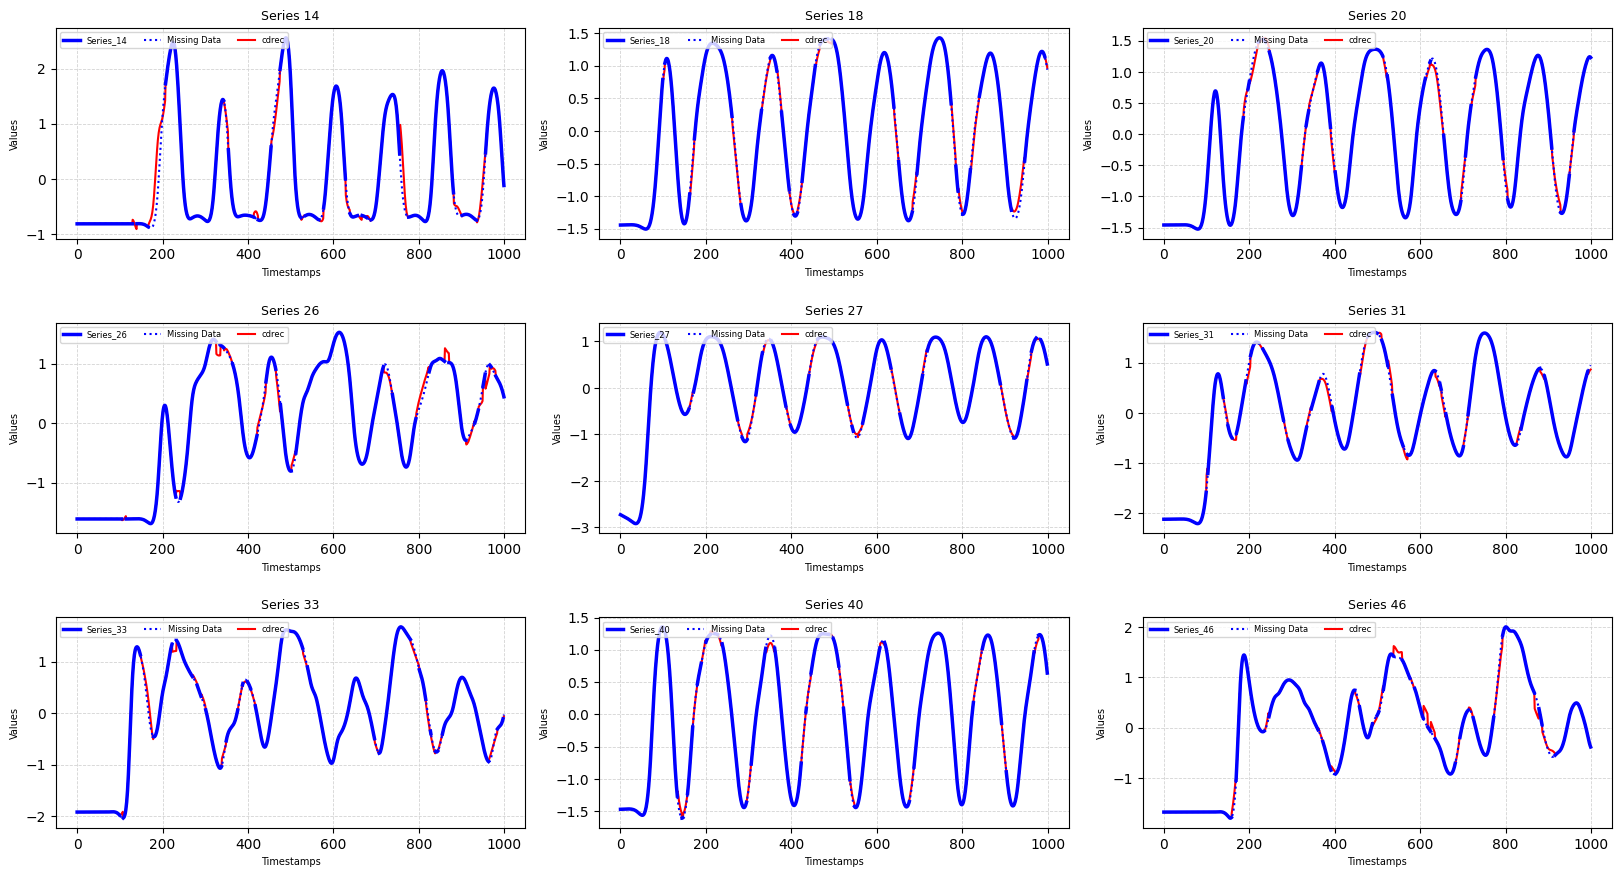

In [68]:
# plot the recovered time series
ts.plot(input_data=ts.data, incomp_data=ts_m, recov_data=imputer.recov_data, nbr_series=9, subplot=True, algorithm=imputer.algorithm, save_path="./imputegap_assets/imputation")

%matplotlib inline
ts.plots.show()

The range of parameter values provided to the AutoML technique can be customized as needed.

In [69]:
from ray import tune
RAYTUNE_PARAMS = {
    'cdrec': {
        "rank": tune.grid_search([i for i in range(2, 16, 1)]),
        "eps": tune.loguniform(1e-6, 1),
        "iters": tune.grid_search([i * 50 for i in range(1, 4)])
    }
}

<br>
More KDD tutorials: https://imputegap-tutorials.github.io/KDD-2025/html/slides_codes.html